In [ ]:
from __future__ import print_function, division
import numpy as np
import pylab as pl

import os
import json
s = json.load( open(os.getenv('PUI2016')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

import statsmodels.api as sm
import statsmodels.formula.api as smf
np.random.seed(99)
%pylab inline

In [ ]:

##this function will fit a line woth statsmodels packages, 
##both with and without including the noise int he fir parameter (WLS and OLS respectively)
##also i can use the statsmodels.formula package passing it a formula, which i will need
##when i want to fit a curve, not a straight line, to the data
def myregression(x, y, method=None): 
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    elif method == 'W':
        rm = sm.WLS(y, x)
    else:
        print ("Problem in the way you called myregression")
        return -1
            
    reg = rm.fit()
    print ("linear regression slope {}".format(reg.summary()))
    return reg

def line(a, b, x):
    return a*x + b

## creating simulated data: just a line 
## then i fit it with a line fit (linear first degree fit) and plotting it

In [ ]:
x = np.linspace(10,100,100)
y = line(0.7, 0, x)

mrnew = myregression(x, y)
xnew = np.linspace(10,100,10)
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
ax.scatter(x, y, label = "just a line")
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax2 = fig.add_subplot(222)
ax2.scatter(x, y, label = "just a line")
ax2.set_xlabel('independent variable')
ax2.set_ylabel('dependent variable')
ax2.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5, 
         label = "statsmodels fit")
ax2.legend()


# adding noise to the line

In [ ]:
y = y + np.random.randn(100) * 2.5
mrold = mrnew

#I use just OLD: the ordinary square fit which does not take the error bars 
#into account
#refer to statsmodels documentation!!
mrnew = myregression(x, y)

fig = pl.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
ax.scatter(x, y, label = "plus some noise")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.5, label='old fit')

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

ax = fig.add_subplot(222)
ax.scatter(x, y, label = "plus some noise")
ax.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5, label='new fit')

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

## adding a bit of curvature to my line

In [ ]:
#y = y+np.cos(x/100*2*np.pi*10.0)
y = y + 3e-3 * ((x - 50)**2)
mrolder = mrold
mrold = mrnew

#now i fit the data taking into account the errorbars: 
#u ise WLS (weighted square fit) 
#instead of OLS (ordinary square fit)
mrnew = myregression(x, y, method='W')

fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(221)
e = np.random.rand(100)*2.5+2.5
ax.errorbar(x, y, yerr=e, fmt='.', label = "and some structure")
ax.plot(xnew, mrolder.predict(xnew), 'k', alpha=0.4,
       label = "fit to line only")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.7,
       label = "fit to line and noise")

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

ax = fig.add_subplot(222)
ax.errorbar(x, y, yerr=e, fmt='.', label = "and some structure")
ax.plot(xnew, mrold.predict(xnew), 'k', alpha=0.7,      
       label = "fit to line and noise")

ax.plot(xnew, mrnew.predict(xnew), 'r', alpha=0.5,
       label = "fit to noisy curve")

ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()


In [ ]:
#to fit a curve i can use statsmodels formula, or i can use scipy polyfit. 
#here i take the residuals from the previous line regression, 
#which are a curve, and i fir those with a second degree polynomial

#here is an example of how to do it with scipy.polyfit  
#(the number 2 refers to the degree of the polynomial i want to fit : 
#refer to the scipy documentation!)

mrres = np.polyfit(x, y-mrnew.predict(x), 2)
#these are the parameters of the fit: the a b and c in 
#ax^2 + bx + c
print ('numpy polyfit parameters', mrres)
fig = pl.figure(figsize=(10,10))
ax=fig.add_subplot(221)
ax.plot(x, y-mrnew.predict(x), 'o', color='DarkGreen', label='residuals')
ax.plot(x, y-mrnew.predict(x), 'k-')

ax.plot(x, mrres[0] * x**2 + mrres[1] * x + mrres[2], 'y',
       label = 'fit to the residuals (with numpy)')
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

ax=fig.add_subplot(222)

#and i plot the "residual of the residuals".... just for fun. 
#this is not normally something which one would include in the analysis
ax.plot(x,y - mrnew.predict(x) - (mrres[0] * x**2 + 
                                  mrres[1] * x + 
                                  mrres[2]), 'y',
       label = "rectified residuals")
ax.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed',
       label = "no residuals")

print ('mean of residuals {0:.2f} ({0:.2e})'.format(
                mean(y - mrnew.predict(x) - (mrres[1] +  mrres[0] * (x)))))
print ('sum squared of residuals {0:.2f} ({0:.2e})'.format(
        np.sqrt(sum((y - mrnew.predict(x))**2))))
ax.set_xlabel('independent variable')
ax.set_ylabel('dependent variable')
ax.legend()

# of course i could have fit a curve to my data in the first place: i did not need to do a line fit, and then fit a curve to the residuals. that may cme in handy if the residuals have a lot of complex structure: for example if i think they may be periodic and i may want to fit a sine wave to it, but generally if i see a set of data which is curvy iw ill fit a curve to it: 

## lets fit a second degree polynomial to the data i had created with y = y+3e-3 ((x-50)**2)


In [ ]:

##second degree polynomial: arguments are i
#independent variable, dependent variable, degree of the polynomial
mrnew = np.polyfit(x, y, 2)

pl.plot(x, y, 'o', color='DarkGreen', label='all in one: ' + 
        'line+noise+curvature')
pl.plot(x, y, 'k-')


pl.plot(xnew, np.poly1d(mrnew)(xnew), 'y', alpha=1, 
        label = '2D polynomial fit with numpy.polyfit')

pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()

In [ ]:
#with statsmodels that is:
smreg = smf.ols(formula="y ~ x1 + I((x1)) + I((x1)**2)", 
                data={"x1" : x, "y" : y} ).fit()
print (smreg.summary())
pl.plot(x, y, 'o', color='DarkGreen', label='all in one : ' + 
        'line+noise+curvature')
pl.plot(x, y, 'k-')


pl.plot(xnew, smreg.predict(exog=dict(x1=xnew)), 
        label = '2D polynomial fit with statsmodels.ols')
pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()


In [ ]:
mrold = mrnew
mrnew = np.polyfit(x, y, 2)
pl.plot([x.min(), x.max()], [0,0],  '-', color='IndianRed')

e = np.random.rand(100)*2.5+2.5
#pl.errorbar(x, y, yerr=e, label = "and some structure")
pl.plot(x, y - np.poly1d(mrnew)(x), 'ro', alpha=0.5,
       label = 'residuals from pylab model fit')
pl.plot(x, y - np.poly1d(mrnew)(x), 'k', alpha=0.5)


pl.xlabel('independent variable')
pl.ylabel('dependent variable')
pl.legend()
print ('mean of residuals {0:.2f} ({0:.2e})'.format(mean(y - 
                                                       (mrnew[2] + 
                                                       mrnew[1] * (x) + 
                                                       mrnew[0] * (x**2)
                                                       ))))
print ('sum squared of residuals {0:.2f} ({0:.2e})'.format(np.sqrt(sum((y - 
                                                      (mrnew[2] + 
                                                       mrnew[1] * 
                         (x) + mrnew[0] * (x**2)))))))


# many more regression diagnostics!
http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/regression_diagnostics.html

# 10/19 in-class:
Fit both a line y=ax+b to it and a quadratic equation y=ax^2 + bx +c to it with statsmodels.formula.api package. Can you compare these models w LE test? Try write down the LR statistics and compare it to a chi sq table. 

In [6]:
import numpy as np # to generate random numbers
import statsmodels as st
import statsmodels.formula.api as smf
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
# generate some points
def line(a, b, x):
    # add Gaussian error
    # make a vector of those that is as long as x
    yerr = np.random.randn(len(x))
    # multiply by something comparable to the square root of y
    yerr = yerr * (np.sqrt(a * x + b).mean())
    """pass x-axis to the line"""
    return a * x + b + yerr

x = np.random.rand(10) * 10 # generates 10 numbers between 0 and 10 (was 1)
line(5, 7, x)

array([  9.27911549,  42.19234063,  38.66526982,  32.05184381,
        49.54925809,  54.72935004,  18.64145099,  47.12595182,
        18.65470167,  40.24042369])

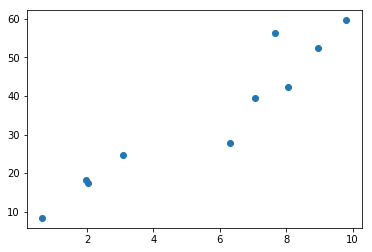

In [16]:
# plot that

line1 = line(5, 7, x)

pl.plot(x, line1, 'o')

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     71.37
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           2.94e-05
Time:                        11:18:30   Log-Likelihood:                -31.074
No. Observations:                  10   AIC:                             66.15
Df Residuals:                       8   BIC:                             66.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.0414      3.890      1.553      0.159        -2.928    15.011
x              5.1506      0.610      8.448      0.000         3.745     6.557
==============================================================================
Omnibus:                        1.388   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.500   Jarque-Bera (JB):                0.040
Skew:                           0.011   Prob(JB):                        0.980
Kurtosis:                       3.308   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

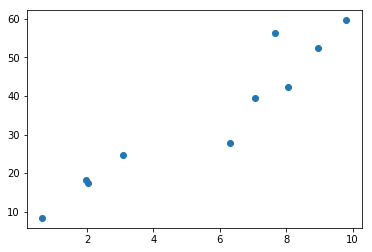

In [19]:
# fit a line to that with stats models
# use formula inside of statsmodels

# let's create a data frame
# good way to convert any array to a dataframe
# you can also create an empty df and add variables to it
dfline = pd.DataFrame({'x': x,'y': line1})
# call OLS, lowercase
# smf.ols? >> look at the parameters
fittedline = smf.ols(formula='y ~ x', data = dfline) # twiddle means y is proportional to x # our formula is still y = ax+b
model = fittedline.fit()
model.summary()

In [20]:
fittedlin2 = smf.ols(formula='y ~ I(x**2)', data = dfline)
model2 = fittedline2.fit()
model2.summary()
# should see R^2 improve
# not suprisingly, we increased the # of parameters
# adjusted-rsquared had actually decreased

NameError: name 'fittedline2' is not defined

In [ ]:
OLSResults.compare_lr_test(restricted) # pass your more complex model to compare with your basic model
# will give you chi-square tests, 